<a href="https://colab.research.google.com/github/amgito1648/clase-inteligencia-artificial/blob/main/Fundamento_Cuaderno_16_Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color="blue"> K-means </font>

## **Introducción al modelo**

El algoritmo K-means es un método de agrupamiento no supervisado que organiza datos en un número predefinido de clusters 𝑘.

Busca minimizar la varianza dentro de cada cluster asignando puntos de datos al centroide más cercano. Es ampliamente utilizado debido a su simplicidad, escalabilidad y eficiencia en diversos problemas como segmentación de clientes, análisis de imágenes y agrupamiento de documentos.

## **Ventajas y desventajas**

**Ventajas:**

Fácil de implementar y comprender.
Computacionalmente eficiente para conjuntos de datos grandes.
Aplicable a problemas con clusters esféricos bien definidos.

**Desventajas:**

Requiere definir el número de clusters (𝑘) de antemano.

Sensible a la escala de los datos y a valores atípicos.

Asume clusters de forma esférica, lo que limita su aplicabilidad en ciertos problemas.

## **Fundamentos matemáticos**

Para llevar a cabo las agrupaciones, todos los métodos de clustering necesitan cuantificar la similitud entre las observaciones, lo que se conoce como distancia. En un espacio de 𝑝 dimensiones, siendo p el número de variables asociadas a cada observación, las observaciones que son más similares estarán más cercanas en el espacio de características.

La versatilidad del clustering radica en la capacidad de utilizar diversas medidas de distancia, lo que permite seleccionar la más adecuada según el contexto y el tipo de datos.

A continuación se presentan algunas de las medidas de distancia más comunes utilizadas en clustering:

El algoritmo minimiza la suma de las distancias cuadradas dentro de cada cluster:

$J = \sum_{i=1}^{k} \sum_{x \in C_i} \| x - \mu_i \|^2$

Donde:

𝑘: número de clusters.

𝐶𝑖: conjunto de puntos en el cluster 𝑖.

𝜇𝑖: centroide del cluster 𝑖.

𝑥: puntos de datos asignados al cluster.


**Medidas de distancia**

Como puede apreciarse en la imagen en un analisis con solo dos facctores las distancias separan dos punto de los datos, en este caso x y y.

![imange](https://github.com/adiacla/bigdata/blob/master/euclediana.JPG?raw=true)

La métrica de distancia más común es la euclidiana, calculada como:

$\text{Distancia Euclidiana} = \sqrt{\sum_{i=1}^{n} (x_i - y_i)^2}$


***Distancia de Manhattan***

La distancia de Manhattan, también conocida como "taxicab metric", se calcula sumando las diferencias absolutas entre las coordenadas de dos puntos. Es menos sensible a los valores atípicos (outliers) que la distancia Euclídea. Su fórmula es:

$d_{\text{manhattan}}(p, q) = \sum_{i=1}^{n} |p_i - q_i|$


Este tipo de distancia se utiliza comúnmente en situaciones donde las diferencias absolutas son más relevantes que las cuadráticas.


***Correlación***

La distancia basada en correlación se utiliza cuando se desea medir la similitud en términos de patrón o forma, no en términos de magnitud. La fórmula general de la distancia de correlación es:

$d_{\text{cor}}(p, q) = 1 - \text{correlación}(p, q)$


La correlación puede ser de diferentes tipos, como la correlación de Pearson, Spearman o Kendall. La distancia de correlación es útil cuando se desea comparar observaciones basadas en sus patrones de cambio, independientemente de las magnitudes absolutas de sus valores.


***Jackknife Correlation***

El coeficiente de correlación de Pearson es una medida efectiva de similitud, pero puede no ser robusto frente a valores atípicos. Para mitigar este efecto, se utiliza la Jackknife Correlation, que calcula los coeficientes de correlación excluyendo una observación en cada paso, y luego promedia estos valores para obtener una estimación más robusta.

La fórmula es:

$\overline{\theta}(A, B) = \frac{1}{n} \sum_{i=1}^{n} r^i$


***Índice Jaccard***

El índice de Jaccard es similar al SMC, pero a diferencia de este, no incluye el término
$𝑀_{00}$  en el numerador ni el denominador. Esto hace que Jaccard se enfoque solo en las coincidencias de los atributos presentes en ambos conjuntos. Su fórmula es:

$J(A,B) = \frac{|A \cap B|}{|A \cup B|}$

La distancia de Jaccard es útil cuando se desea medir la similitud basándose únicamente en la presencia de atributos en lugar de considerar también su ausencia.

***Distancia Coseno***

La distancia coseno mide la similitud entre dos vectores basándose en el ángulo entre ellos. La fórmula es:

$\cos(\alpha) = \frac{x \cdot y}{\|x\| \|y\|}$

donde

𝑥 ⋅𝑦 es el producto punto de los vectores y  ∥𝑥∥ y ∥𝑦∥ son las longitudes (normas) de los vectores. Si los vectores son idénticos en dirección (ángulo 0º), el coseno será 1, mientras que si son ortogonales (ángulo 90º), el coseno será 0.

## **Determinación del número óptimo de clusters**

El número óptimo de clusters se puede determinar utilizando métodos como:

**Método del Codo (Elbow Method):** Evalúa la varianza intra-cluster y busca el punto de inflexión en la gráfica.

**Índice de Silhouette (Silhouette Score):** Mide qué tan similares son los puntos dentro del mismo cluster en comparación con otros clusters:

$s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}$


Donde:


𝑠(𝑖): valor de Silhouette para el punto $_𝑖$.

𝑎(𝑖): distancia promedio del puntoi a otros puntos en el mismo cluster.

𝑏(𝑖): distancia promedio del punto $_𝑖$ al cluster más cercano al que no pertenece.

# <font color="blue"> Visualización Dinámica de KMeans con Datos Sintéticos </font>

**Objetivo**

Este ejercicio tiene como objetivo demostrar visualmente cómo funciona el algoritmo de clustering KMeans, utilizando datos sintéticos de clientes de tarjetas de débito. Se busca que los estudiantes o participantes comprendan el proceso paso a paso mediante una animación 3D interactiva.


**Contexto del problema**

Tenemos un conjunto de datos sin etiquetas, con 3 características por cliente:

* Edad

* Ingreso mensual

* Número de transacciones mensuales

No sabemos cómo están organizados ni qué perfiles de clientes existen. El reto es agruparlos automáticamente con base en su similitud.



In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.cluster import MiniBatchKMeans
import plotly.express as px
import plotly.graph_objects as go

# 1. Generar datos sintéticos
n_samples = 300
features = ['edad', 'ingreso_mensual', 'transacciones_mensuales']
# 1. Generar datos sintéticos con 3 características
X, _ = make_blobs(n_samples=n_samples, centers=3, n_features=3, cluster_std=2.5, random_state=42)


# Crear un DataFrame con nombres más amigables
df = pd.DataFrame(X, columns=features)
df[features] = df[features] - df[features].min() + 1  # para que todos sean > 0
df

In [ ]:

# 4. Visualizar puntos 3D sin categorías
fig = px.scatter_3d(
    df,
    x='edad',
    y='ingreso_mensual',
    z='transacciones_mensuales',
    title="Distribución 3D de Clientes (sin clústeres)",
    labels={
        'edad': 'Edad',
        'ingreso_mensual': 'Ingreso Mensual',
        'transacciones_mensuales': 'Transacciones Mensuales'
    }
)

fig.update_traces(marker=dict(size=4, color='gray', opacity=0.7))
fig.show()

In [ ]:
# 3. Configuración de clustering
X_scaled = df[features].values
n_clusters = 3
max_iters = 30

kmeans = MiniBatchKMeans(
    n_clusters=n_clusters,
    init='random',
    n_init=1,
    max_iter=max_iters,
    random_state=42,
    batch_size=300
)

frames = []
centroid_paths = {i: [] for i in range(n_clusters)}

# 4. Ejecutar paso a paso
for i in range(max_iters):
    kmeans.partial_fit(X_scaled)
    labels = kmeans.predict(X_scaled)
    centroids = kmeans.cluster_centers_

    # Guardar puntos
    df_iter = pd.DataFrame(X_scaled, columns=features)
    df_iter['cluster'] = labels
    df_iter['iter'] = i
    df_iter['type'] = 'punto'

    # Guardar centroides
    df_centroids = pd.DataFrame(centroids, columns=features)
    df_centroids['cluster'] = range(n_clusters)
    df_centroids['iter'] = i
    df_centroids['type'] = 'centroide'

    # Guardar trayectoria de centroides
    for idx, row in df_centroids.iterrows():
        centroid_paths[row['cluster']].append((row['edad'], row['ingreso_mensual'], row['transacciones_mensuales']))

    frames.append(df_iter)
    frames.append(df_centroids)

# 5. Unir todo para animación
df_anim = pd.concat(frames, ignore_index=True)

# 6. Crear figura principal
fig = px.scatter_3d(
    df_anim,
    x='edad',
    y='ingreso_mensual',
    z='transacciones_mensuales',
    color='cluster',
    symbol='type',
    animation_frame='iter',
    title='Proceso de Clustering con KMeans paso a paso',
    labels={
        'edad': 'Edad',
        'ingreso_mensual': 'Ingreso Mensual',
        'transacciones_mensuales': 'Transacciones Mensuales'
    }
)

# 7. Ajustes visuales
fig.for_each_trace(
    lambda trace: trace.update(marker=dict(size=8, symbol='diamond', color='black')) if 'centroide' in trace.name
    else trace.update(marker=dict(size=4, opacity=0.6))
)

# 8. Hacer animación más lenta
fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 1000  # 1 segundo por frame
fig.layout.updatemenus[0].buttons[0].args[1]['transition']['duration'] = 500

# 9. Añadir trayectorias de centroides como líneas
for cluster_id, path in centroid_paths.items():
    xs, ys, zs = zip(*path)
    fig.add_trace(go.Scatter3d(
        x=xs,
        y=ys,
        z=zs,
        mode='lines+markers',
        name=f'Trayectoria C{cluster_id}',
        line=dict(width=4),
        marker=dict(size=4, symbol='cross'),
        showlegend=True
    ))

fig.show()

In [ ]:
#Imprimir los centroides
print(kmeans.cluster_centers_)

# <font color="blue">Taller: Aplicación del algoritmo K-means con el conjunto de datos de clientes </font>

**Objetivo:**

En este taller, se va a aplicar el algoritmo de K-means clustering a un conjunto de datos de clientes para identificar grupos de clientes con características similares. Este proceso es un ejemplo de aprendizaje no supervisado, en el cual el objetivo es segmentar a los clientes en grupos (clusters) sin tener etiquetas previas sobre a qué grupo pertenecen.

**Descripción del conjunto de datos:**

El conjunto de datos proviene de una tienda online que contiene información sobre los clientes. Las columnas relevantes en el conjunto de datos son:

* ID: Identificador único del cliente.
* Genero: Sexo del cliente (Male/Female).
* Edad: Edad del cliente.
* Ciudad: Ciudad de residencia del cliente.
* Ingresos: Ingresos anuales del cliente.
* Credito: Calificación de crédito del cliente.
* Gastos: Monto gastado por el cliente en la tienda.
* Trabajo: Tipo de trabajo (por ejemplo, 1: oficina, 2: servicio, etc.).



### **Metodología del taller:**

**Cargar y preprocesar los datos.**

* Cargar el conjunto de datos en un DataFrame.
* Realizar el preprocesamiento de los datos, como la codificación de variables categóricas y la normalización de los datos numéricos.
* Aplicar el algoritmo K-means.

* Determinar el número de clusters adecuado.
* Aplicar el algoritmo K-means para segmentar los datos en grupos.
* Evaluación de los resultados.

* Visualizar los clusters obtenidos para observar cómo se distribuyen los clientes.
* Evaluar el rendimiento utilizando métricas como la inercia o el codo de K-means.
* Interpretar los resultados.

* Analizar las características de cada grupo para entender los perfiles de los clientes en cada cluster.


# Método del Codo (Elbow Method)


El método del codo es una técnica utilizada para determinar el número óptimo de clusters (k) a utilizar en el algoritmo de K-means. Este es uno de los métodos más comunes para elegir el valor de k, ya que no requiere conocimiento previo sobre la estructura de los datos.



¿Cómo funciona el Método del Codo?

![imagen](https://github.com/adiacla/bigdata/blob/master/codo.png?raw=true)

Huawei. (n.d.). Imagen ilustrativa sobre el tema. Huawei Forum. Recuperado de https://forum.huawei.com/enterprise/api/file/v1/small/thread/667237354236153856.png?appid=esc_es


El método del codo se basa en la inercia del modelo, que es una medida de la suma de las distancias cuadradas entre cada punto de datos y su centroide asignado. La inercia, o también conocida como within-cluster sum of squares (WCSS), disminuye a medida que aumentamos el número de clusters, ya que cada cluster se vuelve más pequeño y más ajustado a los puntos de datos.
Como se observa en la imagen el valor WSS o WCSS tiene un punto de inflexión alto hasta el número 4, luego el WSS disminuye en una tasa menor. Esto sugiere que el valor k recomendado es 4.


**Proceso:**

1. Se aplica el algoritmo K-means con diferentes valores de 𝑘 (por ejemplo, de 𝑘=2 a 𝑘=11).

2. Para cada valor de 𝑘, se calcula la inercia (suma de las distancias cuadradas entre los puntos y sus centroides).

3. Se grafica la inercia contra el número de clusters 𝑘.

4. El "Codo": A medida que aumentamos el valor de 𝑘, la inercia disminuirá porque los puntos de datos estarán más cerca de sus centroides.

El codo de la gráfica es el punto donde la tasa de disminución de la inercia se desacelera considerablemente. Este es el valor de 𝑘 que indica el número óptimo de clusters. En nuestro caso es el numero 4.

Si continúas aumentando 𝑘 después de este punto, la reducción en la inercia será mínima, lo que sugiere que no se necesitan más clusters.

## Cargar y Preprocesar los Datos

Este bloque de código realiza una serie de pasos fundamentales para cargar, procesar y visualizar un conjunto de datos. A continuación, explico cada paso del código proporcionado.

In [ ]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Cargar los datos desde la URL
url = "https://raw.githubusercontent.com/adiacla/bigdata/refs/heads/master/Shopping_CustomerData.csv"
data = pd.read_csv(url)

# Visualizar las primeras filas de los datos
data


,ID,Genero,Edad,Ciudad,Ingresos,Credito,gastos,trabajo
0,1001,Male,49,Bengaluru,527547.58850,653,78,1
1,1002,Male,59,Bengaluru,207143.19760,630,63,1
2,1003,Female,54,Delhi,164423.84570,555,69,4
3,1004,Female,42,Bengaluru,56220.36443,699,30,1
4,1005,Female,30,Bengaluru,256194.36190,793,6,1
...,...,...,...,...,...,...,...,...
195,1196,Female,54,Delhi,317466.42070,601,52,4
196,1197,Female,20,Bengaluru,323305.50020,554,58,1
197,1198,Male,44,Chennai,109058.54430,844,36,2
198,1199,Male,28,Delhi,160116.89300,837,24,4


#EDA y PReporcesamiento

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        200 non-null    int64  
 1   Genero    200 non-null    object 
 2   Edad      200 non-null    int64  
 3   Ciudad    200 non-null    object 
 4   Ingresos  200 non-null    float64
 5   Credito   200 non-null    int64  
 6   gastos    200 non-null    int64  
 7   trabajo   200 non-null    int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 12.6+ KB


In [ ]:
data.describe()

,ID,Edad,Ingresos,Credito,gastos,trabajo
count,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000
mean,1100.500000,45.520000,285143.931646,719.975000,50.70500,2.850000
std,57.879185,16.113592,169229.187619,104.578236,28.72269,1.475938
min,1001.000000,18.000000,2577.057456,551.000000,2.00000,1.000000
25%,1050.750000,31.750000,153227.340950,628.250000,27.75000,1.750000
50%,1100.500000,46.500000,263418.505550,715.000000,48.00000,3.000000
75%,1150.250000,59.000000,384857.116200,806.250000,77.00000,4.000000
max,1200.000000,75.000000,695407.091700,897.000000,100.00000,5.000000


In [ ]:
#Cardinalidad de la ciudad
data.Ciudad.T.unique()

array(['Bengaluru', 'Delhi', 'Chennai', 'Mumbai', 'Kolkata'], dtype=object)

In [ ]:
#Cardinalidad de trabajo
data.trabajo.T.unique()

array([1, 4, 2, 5, 3])

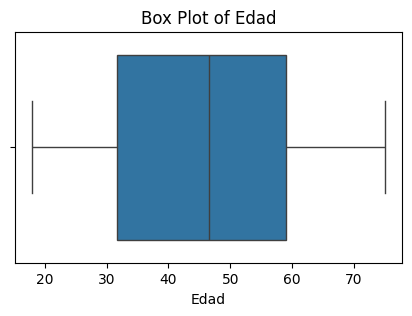

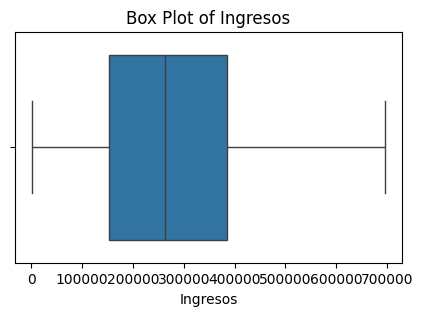

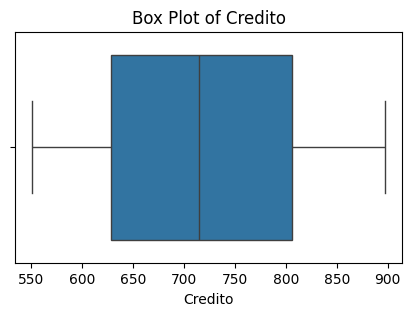

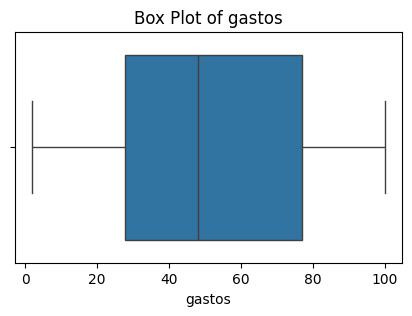

In [ ]:
 # Graficar caja de bigotes de las variables numericas una por una

import matplotlib.pyplot as plt
# Create box plots for numerical variables
numerical_features = ['Edad', 'Ingresos', 'Credito', 'gastos']
for feature in numerical_features:
    plt.figure(figsize=(5, 3))
    sns.boxplot(x=data[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()


Dada el análisis no se detectan outliers significativos en ninguna de las variables númericas, pero ciudad y trabajo son variables categoricas nominales, por lo tanto deberían numerizarse usando one-hot-encoder.

Para este ejercicio "NO" los vamos a tener en cuenta.

Además en "describe" se obervan que están a diferentes escalas y por lo tanto debemos normalizar. El género es tambien categórico y podemos codificar con 0 y 1.

In [ ]:
data.isnull().sum()

,0
ID,0
Genero,0
Edad,0
Ciudad,0
Ingresos,0
Credito,0
gastos,0
trabajo,0


##Codificar la variable 'Genero' (Male = 0, Female = 1):

Primero, se codifica la variable categórica 'Genero' (Male = 0, Female = 1) para convertirla en una forma numérica.

Luego, se selecciona las columnas numéricas relevantes para el análisis (Edad, Ingresos, Credito, Gastos y Genero) y se eliminna las no necesarias, como ID y Ciudad y Trabajo.

A continuación, normalizamos los datos utilizando el StandardScaler de scikit-learn, asegurando que todas las variables tengan la misma escala (media 0 y desviación estándar 1).

Esto es crucial para que ninguna variable, como Ingresos, domine las distancias calculadas en el algoritmo K-means. El resultado es un conjunto de datos listos para ser procesados y segmentados en grupos utilizando técnicas de clustering.

In [ ]:

# Codificar la variable 'Genero' usando map(Male = 0, Female = 1)
data['Genero'] = data['Genero'].map({'Male': 0, 'Female': 1})
#Otra opción es usar replace.
#Tecera opción labelencoder.

data.Genero.dtype

dtype('int64')

In [ ]:
#Normalizar
# Seleccionar las columnas numéricas para la segmentación (eliminando ID, Trabajo y Ciudad)
data_numeric = data[['Edad', 'Ingresos', 'Credito', 'gastos', 'Genero']]

# Normalizar los datos numéricos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)

# Visualizar las primeras filas de los datos escalados
data_scaled[:5]


array([[ 0.2165087 ,  1.43599311, -0.64203672,  0.95267867, -1.12815215],
       [ 0.83866013, -0.46207437, -0.86251966,  0.42913296, -1.12815215],
       [ 0.52758441, -0.71514273, -1.58148576,  0.63855125,  0.88640526],
       [-0.2189973 , -1.3561374 , -0.20107085, -0.72266759,  0.88640526],
       [-0.96557902, -0.17149652,  0.70003332, -1.56034072,  0.88640526]])

## Aplicar el Algoritmo K-means

Para determinar el número óptimo de clusters, utilizaremos el método del codo.

**Inicialización:** Se inicializa un ciclo donde se prueba el algoritmo K-means con diferentes números de clusters, comenzando desde 2 hasta 15 en este caso. Para cada número de clusters, se calcula la inercia.

**Cálculo de la inercia:** Para cada valor de $k$ (el número de clusters), se entrena el modelo K-means y se calcula la inercia, que se almacena en una lista llamada inercia.

**Gráfico del codo:** Luego, se grafica la inercia en función del número de clusters. En este gráfico, el eje X muestra el número de clusters (k) y el eje Y muestra el valor de la inercia.

**Interpretación del gráfico:** El "codo" en el gráfico es el punto donde la inercia deja de disminuir de manera tan pronunciada y comienza a estabilizarse. Este punto indica el número óptimo de clusters, ya que añadir más clusters más allá de este punto no mejora significativamente la calidad del agrupamiento. Según el gráfico obtenido, el número óptimo de clusters parece ser 11, ya que después de ese punto la disminución de la inercia es menos pronunciada.

In [ ]:
# Método del codo para determinar el número de clusters óptimo
inertia = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)
    print("Inercia ", kmeans.inertia_, " del k ", k)




Inercia  846.6924990516313  del k  2
Inercia  699.322862145688  del k  3
Inercia  632.8635304779284  del k  4
Inercia  566.9892560482755  del k  5
Inercia  519.1512976936206  del k  6
Inercia  492.30204624368105  del k  7
Inercia  457.3667688735209  del k  8
Inercia  428.4571407391224  del k  9
Inercia  385.0017065973337  del k  10
Inercia  351.0023628599269  del k  11
Inercia  335.31854103465133  del k  12
Inercia  318.7785238480958  del k  13
Inercia  302.2521226767126  del k  14
Inercia  287.6830547747509  del k  15
Inercia  270.3348648832855  del k  16
Inercia  257.91488875389297  del k  17
Inercia  251.25959924877412  del k  18
Inercia  245.51607159287963  del k  19


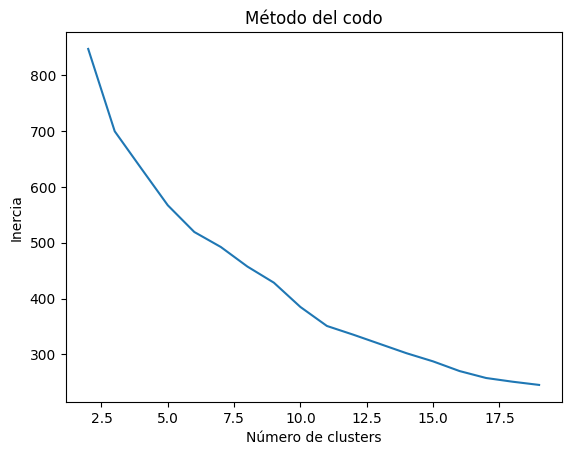

In [ ]:
# Graficar el codo
plt.plot(range(2, 20), inertia)
plt.title("Método del codo")
plt.xlabel("Número de clusters")
plt.ylabel("Inercia")
plt.show()


Aplicar K-means con el número de clusters determinado (k=11)


En este bloque de código se lleva a cabo la aplicación del algoritmo K-means con el número de clusters determinado previamente (en este caso, 𝑘=11) y se visualizan los resultados obtenidos.

In [ ]:
# Aplicar K-means con el número de clusters determinado (k=11)
kmeans = KMeans(n_clusters=11, random_state=42)
data['Cluster'] = kmeans.fit_predict(data_scaled)

# Ver los resultados
print(data[['ID', 'Genero', 'Edad', 'Ingresos', 'Credito', 'gastos', 'Cluster']].head(20))


      ID  Genero  Edad      Ingresos  Credito  gastos  Cluster
0   1001       0    49  527547.58850      653      78        8
1   1002       0    59  207143.19760      630      63        0
2   1003       1    54  164423.84570      555      69        2
3   1004       1    42   56220.36443      699      30        4
4   1005       1    30  256194.36190      793       6        3
5   1006       1    38  475324.89030      635      97       10
6   1007       1    45  186352.34820      881       2        3
7   1008       1    23  414233.15690      852      77        1
8   1009       0    59   97263.51748      708      22        6
9   1010       1    48  179271.23320      669      97        2
10  1011       0    55  194016.57710      618      13        6
11  1012       1    73  227536.13840      614      62        2
12  1013       1    54  384549.19600      711      64        9
13  1014       1    34  441207.68960      629      29       10
14  1015       0    54  195955.92110      764      53  

In [ ]:
#Imprmir los centriodes
print(kmeans.cluster_centers_)

[[-0.20517172 -0.97732761 -0.98873815  0.13051801 -1.12815215]
 [-0.46785787  0.69100945  0.94753196  0.98599522  0.88640526]
 [ 0.6159954  -0.67756853 -0.61680984  1.16944496  0.88640526]
 [-1.0322381   0.07961204  1.09786123 -1.22876177  0.88640526]
 [ 0.02208638 -1.04909949 -0.22064271 -0.53360942  0.88640526]
 [-0.95248109 -0.26025468  0.80548168 -0.12564178 -1.12815215]
 [ 0.94895061 -0.34868618  0.30176968 -0.92098036 -1.12815215]
 [ 0.88843224  0.19331968  0.83136446  1.16558726 -1.12815215]
 [ 0.22428559  1.16645486 -0.86551535 -0.19039612 -1.12815215]
 [ 1.03840348  0.87745021 -0.10369509 -0.51508631  0.88640526]
 [-1.10464816  0.86324803 -0.93187874  0.44555793  0.53089513]]


In [ ]:
#Desnormalizar los centroides

centroids = scaler.inverse_transform(kmeans.cluster_centers_)
centroids=pd.DataFrame(centroids, columns=['Edad', 'Ingresos', 'Credito', 'gastos', 'Genero'])
print(centroids)

         Edad       Ingresos     Credito     gastos    Genero
0   42.222222  120165.573576  616.833333  54.444444  0.000000
1   38.000000  401790.185118  818.818182  78.954545  1.000000
2   55.421053  170766.579303  655.631579  84.210526  1.000000
3   28.928571  298582.889050  834.500000  15.500000  1.000000
4   45.875000  108050.079463  696.958333  35.416667  1.000000
5   30.210526  241211.488888  804.000000  47.105263  0.000000
6   60.772727  226283.756840  751.454545  24.318182  0.000000
7   59.800000  317777.373800  806.700000  84.100000  0.000000
8   49.125000  482048.026850  629.687500  45.250000  0.000000
9   62.210526  433262.427095  709.157895  35.947368  1.000000
10  27.764706  430865.020588  622.764706  63.470588  0.823529


In [ ]:
# Visualización de los clusters (utilizando solo 'Edad' y 'Ingresos' para simplificar)
plt.scatter(data['Edad'], data['Ingresos'], c=data['Cluster'], cmap='viridis')
plt.title("Clusters de Clientes")
plt.xlabel('Edad')
plt.ylabel('Ingresos')
plt.colorbar(label='Cluster')
plt.show()


El gráfico anterior nos muestra solo el cruce de la variable Edad con Ingresos, por lo tanto es impoisible observar claramanete la division o segmentación de los cluster utilizando el método gráfico, porque la construcción de los clústeres es multivariado.


Evaluación de los resultados:

Interpretación de los clusters: Una vez que los clientes han sido agrupados en clusters, podemos analizar las características promedio de cada grupo para determinar las características comunes. Por ejemplo, el Cluster 0 podría estar compuesto por clientes jóvenes con ingresos más bajos, mientras que el Cluster 1 podría agrupar a clientes mayores con ingresos elevados.

In [ ]:
data.info()

# Analizar las características de cada clúster

Este bloque de código se utiliza para analizar las características promedio de cada uno de los clusters generados por el algoritmo K-means, lo que permite comprender las diferencias entre los distintos grupos segmentados.

Explicación paso a paso:

1. Agrupación por clusters:

Se seleccionan las columnas de interés en el DataFrame (data), que son ID, Género, Edad, Ingresos, Crédito, Gastos, y Cluster.
Luego, se agrupa el DataFrame por la columna 'Cluster', lo que significa que se organiza el conjunto de datos en 11 grupos, uno para cada cluster.

2. Cálculo de las características promedio:

Después de agrupar los datos por Cluster, se aplica el método mean() para calcular la media de las demás variables numéricas dentro de cada grupo. Esto proporciona una visión general de las características de cada cluster.
Edad promedio dentro de cada clúster.

- Ingresos promedio de los clientes en cada grupo.
- Crédito promedio dentro de cada cluster.
- Gastos promedio de cada grupo.

In [ ]:
# Analizar las características de cada cluster
cluster_summary = data[['Genero', 'Edad', 'Ingresos', 'Credito', 'gastos', 'Cluster']].groupby('Cluster').mean()
print(cluster_summary)

In [ ]:
# Assuming you want to change the type to pandas category
data.Cluster = data.Cluster.astype('category')

In [ ]:
data.Cluster.value_counts()

##Desglose y análisis por cluster:

Cluster 0 (Hombres, Promedio)
Género: Hombre (0)

Edad promedio: 42.22 años

Ingreso promedio: 120,165.57

Crédito promedio: 616.83

Gastos promedio: 54.44

Este grupo tiene ingresos promedio relativamente bajos en comparación con otros clusters, lo que podría indicar que son clientes con un poder adquisitivo limitado. Aunque sus gastos no son altos, su nivel de crédito parece moderado, lo que sugiere que podrían estar utilizando más de lo que su nivel de ingreso justifica, o simplemente tienen un crédito disponible no completamente aprovechado.

Cluster 1 (Mujeres, Promedio)
Género: Mujer (1)

Edad promedio: 38 años

Ingreso promedio: 401,790.19

Crédito promedio: 818.82

Gastos promedio: 78.95

Este grupo tiene un ingreso mucho más alto que el Cluster 0, lo que sugiere que las mujeres en este grupo podrían estar más establecidas financieramente o tener roles de mayor remuneración. También tienen un crédito más alto, lo que podría ser una indicación de que tienen mayor acceso al crédito o lo están utilizando más. Sus gastos son también altos, lo que podría reflejar una mayor capacidad de consumo o también un mayor riesgo de endeudamiento.

Cluster 2 (Mujeres, Promedio)
Género: Mujer (1)

Edad promedio: 55.42 años

Ingreso promedio: 170,766.58

Crédito promedio: 655.63

Gastos promedio: 84.21

Este grupo está compuesto principalmente por mujeres de edad avanzada con ingresos intermedios. Sus créditos no son excesivamente altos en comparación con el Cluster 1, pero sus gastos son elevados. Podría tratarse de clientes que ya han alcanzado una estabilidad financiera, pero que tienen un riesgo de endeudamiento por sus altos gastos.

Cluster 3 (Mujeres, Promedio)
Género: Mujer (1)

Edad promedio: 28.93 años

Ingreso promedio: 298,582.89

Crédito promedio: 834.50

Gastos promedio: 15.50

Este grupo está formado por mujeres jóvenes con ingresos altos. A pesar de tener un crédito relativamente alto, sus gastos son bajos, lo que podría indicar un bajo nivel de endeudamiento o una tendencia a ahorrar o no usar demasiado el crédito disponible. Este grupo tiene un comportamiento prudente en términos de gasto.

Cluster 4 (Mujeres, Promedio)
Género: Mujer (1)

Edad promedio: 45.88 años

Ingreso promedio: 108,050.08

Crédito promedio: 696.96

Gastos promedio: 35.42

Este grupo tiene ingresos relativamente bajos en comparación con otros clusters de mujeres, pero un crédito moderadamente alto. Sus gastos son también bajos. Es un grupo con un equilibrio moderado entre ingreso y gastos, lo que podría indicar una gestión prudente de sus finanzas.

Cluster 5 (Hombres, Promedio)
Género: Hombre (0)

Edad promedio: 30.21 años

Ingreso promedio: 241,211.49

Crédito promedio: 804.00

Gastos promedio: 47.11

Este grupo está formado por hombres jóvenes con un ingreso moderado. Aunque su crédito es alto, sus gastos son relativamente bajos, lo que sugiere que están controlando su endeudamiento o no lo están utilizando por completo. Su situación financiera parece estar equilibrada, pero podrían ser más propensos a aumentar su deuda si no se les controla.

Cluster 6 (Hombres, Promedio)
Género: Hombre (0)

Edad promedio: 60.77 años

Ingreso promedio: 226,283.76

Crédito promedio: 751.45

Gastos promedio: 24.32

Este grupo está formado por hombres de mayor edad, con ingresos moderados pero un bajo nivel de gastos. Esto sugiere que tienen un comportamiento conservador en cuanto a sus finanzas, posiblemente debido a su cercanía a la jubilación. Su bajo nivel de gasto puede ser una señal de que están priorizando el ahorro o una posible tendencia a no utilizar el crédito disponible.

Cluster 7 (Hombres, Promedio)
Género: Hombre (0)

Edad promedio: 59.80 años

Ingreso promedio: 317,777.37

Crédito promedio: 806.70

Gastos promedio: 84.10

Este grupo de hombres tiene un ingreso alto y un gasto también elevado, lo que puede reflejar un estilo de vida más lujoso o mayores necesidades de consumo. Tienen un crédito elevado, lo que puede indicar un mayor riesgo de endeudamiento si no se controla correctamente.

Cluster 8 (Hombres, Promedio)
Género: Hombre (0)

Edad promedio: 49.13 años

Ingreso promedio: 482,048.03

Crédito promedio: 629.69

Gastos promedio: 45.25

Este grupo tiene los ingresos más altos entre los hombres, pero sus gastos son relativamente bajos, lo que podría reflejar un comportamiento de ahorro o un uso moderado del crédito. Su perfil sugiere estabilidad financiera con un bajo riesgo de endeudamiento, aunque con un buen nivel de ingresos.

Cluster 9 (Mujeres, Promedio)
Género: Mujer (1)

Edad promedio: 62.21 años

Ingreso promedio: 433,262.43

Crédito promedio: 709.16

Gastos promedio: 35.95

Este grupo está compuesto por mujeres mayores con altos ingresos y un nivel moderado de crédito. Sus gastos no son excesivos, lo que sugiere un comportamiento financiero conservador o priorización del ahorro.

Cluster 10 (Hombres/Mujeres, Promedio)
Género: Mixto (0.82 hombre, 0.18 mujer)

Edad promedio: 27.76 años

Ingreso promedio: 430,865.02

Crédito promedio: 622.76

Gastos promedio: 63.47

Este grupo tiene un ingreso alto con un crédito moderado, pero sus gastos son relativamente elevados. Aunque el género está equilibrado, el grupo parece ser más joven, lo que podría indicar que tienen menos experiencia financiera, aunque con un gran poder adquisitivo.

Estrategias para controlar o motivar el endeudamiento y las ventas:
1. Control del Endeudamiento:
Educación Financiera: Promover campañas de educación financiera, especialmente para los grupos con altos niveles de crédito, como los Clusters 1, 3, 5 y 7, con el fin de fomentar el uso responsable del crédito.

Alertas de Gasto: Implementar alertas o límites de gasto para los clientes que están utilizando una parte significativa de su crédito disponible. Esto puede ayudar a evitar que se excedan en sus niveles de deuda.

Beneficios por Pago Anticipado: Ofrecer incentivos a aquellos que paguen sus deudas antes de la fecha de vencimiento, como descuentos en intereses o recompensas en puntos de fidelidad.

Revisión de Créditos: Realizar revisiones periódicas de los créditos disponibles y ajustarlos según el comportamiento financiero de cada cliente, lo que ayuda a mantener un equilibrio adecuado entre ingresos, gastos y deuda.

2. Motivar las Ventas:
Ofertas Personalizadas: Ofrecer promociones y descuentos basados en el comportamiento de compra de cada cluster, destacando los productos que más se ajusten a sus intereses.

Recompensas por Fidelidad: Implementar programas de recompensas que incentiven compras repetidas o aumenten la frecuencia de compra en clientes con alto poder adquisitivo (Clusters 1, 8, 9).

Promociones a Plazos: Para aquellos con un comportamiento más conservador en cuanto a gastos (Clusters 2, 6, 10), ofrecer la opción de pagar en cuotas sin intereses, lo que puede facilitar la compra de productos de alto valor.

Eventos Exclusivos: Organizar eventos exclusivos para clientes con altos ingresos, como Clusters 1, 8, 9, donde se les ofrezcan productos de lujo o experiencias premium que fomenten la compra impulsiva.

Estas estrategias buscan un equilibrio entre controlar el endeudamiento de los clientes y al mismo tiempo fomentar las ventas mediante el análisis personalizado de cada grupo.



#Método de Silhouette



El método de average silhouette permite determinar el número óptimo de clusters en un conjunto de datos. Este enfoque evalúa qué tan bien se asignaron las observaciones a sus clusters comparando su similitud con las observaciones dentro del mismo cluster y en otros clusters.

**Aplicación al Taller**

En el taller, trabajamos con un conjunto de datos de clientes de una tienda. Después de normalizar las variables (Edad, Ingresos, Crédito, etc.) y aplicar el algoritmo K-means para agrupar los datos, y utilizamos el método del codo, pero ahora vamos a usar el método silhouette para validar la calidad de la segmentación.

**Pasos del Cálculo del Coeficiente de Silhouette:**

**Cálculo de $𝑎_𝑖$ :**

Para cada cliente (observación 𝑖), calculamos el promedio de las distancias ($𝑎_𝑖) entre ese cliente y el resto de los clientes en su mismo cluster.

Por ejemplo, si un cliente está en el cluster 1, calculamos la media de las distancias entre ese cliente y todos los demás en el cluster 1.

Un $𝑎_𝑖$ bajo indica que la asignación es adecuada, ya que está cerca de otros clientes en el mismo grupo.

**Cálculo de $𝑏_𝑖$:**

Luego, calculamos la distancia promedio entre el cliente 𝑖 y los clientes en los demás clusters.
Identificamos $𝑏_𝑖$ como la menor de estas distancias promedio, que representa el cluster más cercano (el vecino más próximo).

**Cálculo del Coeficiente de Silhouette ($𝑠_𝑖$):**

Utilizamos la fórmula:
$s_i = \frac{b_i - a_i}{\max(a_i, b_i)}$

Un valor cercano a 1 indica una buena asignación; valores cercanos a 0 sugieren que el cliente está en el límite entre clusters, y valores negativos indican una mala asignación.

**Determinación del Número Óptimo de Clusters**

Calculamos el coeficiente de silhouette para diferentes valores de
𝑘 (número de clusters). En este caso práctico:

Probamos valores de 𝑘 desde 2 hasta 15.

El 𝑘 que maximiza la media del coeficiente de silhouette entre todas las observaciones se considera el número óptimo de clusters.


In [ ]:
from sklearn.metrics import silhouette_score

# Definir el rango de posibles números de clusters
range_clusters = range(2, 15)

# Lista para almacenar las puntuaciones de silueta
silhouette_scores = []

# Calcular el coeficiente de silueta para cada número de clusters
for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(data_scaled)
    silhouette_avg = silhouette_score(data_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Graficar el promedio del coeficiente de silueta
plt.figure(figsize=(10, 6))
plt.plot(range_clusters, silhouette_scores, marker='o')
plt.title("Método del coeficiente de silueta")
plt.xlabel("Número de clusters")
plt.ylabel("Coeficiente de silueta promedio")
plt.xticks(range_clusters)
plt.show()

# Número óptimo de clusters basado en el máximo valor del coeficiente de silueta
optimal_clusters = range_clusters[silhouette_scores.index(max(silhouette_scores))]
print(f"Número óptimo de clusters: {optimal_clusters}")

En el método del Coeficiente de Silueta, se toma el valor más alto del coeficiente promedio para determinar el número óptimo de clusters, en este caso sería 11.

El razonamiento detrás de esto es que un valor de silueta cercano a 1 indica que los puntos están bien agrupados dentro de su cluster y bien separados de los demás clusters. Por tanto:

Silhouette cercano a 1: Buena asignación al cluster correcto.
Silhouette cercano a 0: Los puntos están en los límites entre clusters.
Silhouette negativo (< 0): Mala asignación, el punto pertenece más al cluster vecino.
El número de clusters que maximiza el promedio del coeficiente de silueta (considerando todas las observaciones) es considerado el número óptimo.

Así el agrupamiento más recomendable sería 11.